### Question 1: How did developers decide to buy a new tool in 2022? 

We will look at the result survey to the question of how developers decided to buy a new tool. 

In [14]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('./survey_results_public_2022.csv')
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [15]:
# We can see that the column 'BuyNewTool' shows methods as a combination, i.e many methods are included in a response. 
# We will need to find a way to count the occurences of each value seperately, instead of each combination response like that. 
# Create another dataframe by slicing the 'BuyNewTool' column from the original dataframe, and use the value_counts method
# to count the occurences of each combination. Call this df method. 
method = df['BuyNewTool'].value_counts().reset_index()
method.rename(columns={'index':'method','BuyNewTool':'count'},inplace=True)
method.head()

,method,count
0,Start a free trial;Visit developer communities...,11787
1,Start a free trial;Ask developers I know/work ...,7454
2,Start a free trial;Visit developer communities...,5377
3,Start a free trial,5210
4,Visit developer communities like Stack Overflo...,4886


In [16]:
# create a list of unique methods 
method_df = method['method'].str.split(';', expand=True)
possible_methods = pd.unique(method_df[[0,1,2,3,4,5,6]].values.ravel()).tolist()
possible_methods

['Start a free trial',
 'Visit developer communities like Stack Overflow',
 'Ask developers I know/work with',
 None,
 'Read ratings or reviews on third party sites like G2Crowd',
 'Other (please specify):',
 'Research companies that have advertised on sites I visit',
 'Research companies that have emailed me']

In [17]:
# now we need to create a function to count the occurrences of each value seperately
def count(df,col1,col2,look_for):
    ''' 
    INPUT:
    df - the sliced dataframe as the result of value_counts method 
    col1 - the column with the combinations of values
    col2 - the column with the count value for the combination
    look_for - the list of unique values 

    OUTPUT:
    new_df - a new dataframe with 2 columns, 1 column is the unique value, 1 column is the count of that unique value

    '''
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range(df.shape[0]):
            if (val is not None) and (val in df[col1][idx]):
                new_df[val] += int(df[col2][idx])   
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [18]:
# Call the count function on the df method. 
method_counts = count(method, 'method', 'count', possible_methods)
method_counts

,method,count
0,Start a free trial,48849
2,Ask developers I know/work with,45588
1,Visit developer communities like Stack Overflow,42762
3,Read ratings or reviews on third party sites l...,20235
5,Research companies that have advertised on sit...,9136
4,Other (please specify):,4438
6,Research companies that have emailed me,3667


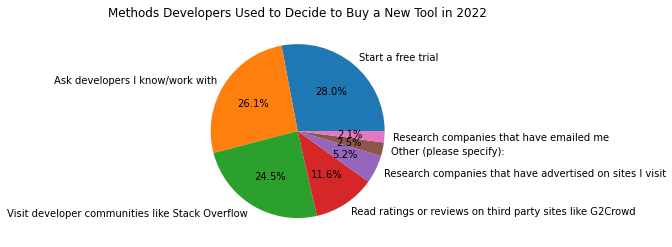

In [19]:
# Now create a bar chart to show the proportion of each unique method. 
plt.pie(method_counts['count'],labels=method_counts['method'],autopct='%1.1f%%')
plt.title("Methods Developers Used to Decide to Buy a New Tool in 2022")
plt.show()